In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load your dataset
df = pd.read_excel("/content/Earnings Manipulator (1).xlsx")

In [ ]:
df.head()

,Company ID,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,Manipulator
0,1,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082,Yes
1,2,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732,Yes
2,3,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305,Yes
3,4,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975,Yes
4,5,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047,Yes


In [ ]:
X = df[['DSRI','GMI','AQI','SGI','DEPI','SGAI','ACCR','LEVI']]
y = df['Manipulator'].map({'No': 0, 'Yes': 1})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_prob = svm_model.predict_proba(X_test_scaled)[:,1]

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_prob = knn_model.predict_proba(X_test_scaled)[:,1]

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_prob = nb_model.predict_proba(X_test)[:,1]

In [ ]:
ada_model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)
ada_prob = ada_model.predict_proba(X_test)[:,1]

In [ ]:
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_prob = xgb_model.predict_proba(X_test)[:,1]

In [ ]:
def evaluate(model_name, y_true, y_pred, y_prob):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_prob)
    }

results = []

results.append(evaluate("SVM", y_test, svm_pred, svm_prob))
results.append(evaluate("KNN", y_test, knn_pred, knn_prob))
results.append(evaluate("Naive Bayes", y_test, nb_pred, nb_prob))
results.append(evaluate("AdaBoost", y_test, ada_pred, ada_prob))
results.append(evaluate("XGBoost", y_test, xgb_pred, xgb_prob))

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,SVM,0.854545,1.000000,0.2,0.333333,0.862222
1,KNN,0.836364,1.000000,0.1,0.181818,0.781111
2,Naive Bayes,0.818182,0.500000,0.3,0.375000,0.724444
3,AdaBoost,0.836364,1.000000,0.1,0.181818,0.805556
4,XGBoost,0.890909,0.833333,0.5,0.625000,0.831111


In [ ]:
best_model = results_df.loc[results_df['F1-score'].idxmax()]
print("Best Model Based on F1-score:")
print(best_model)

Best Model Based on F1-score:
Model         XGBoost
Accuracy     0.890909
Precision    0.833333
Recall            0.5
F1-score        0.625
ROC-AUC      0.831111
Name: 4, dtype: object


In [ ]:
print("\nSVM Report:\n", classification_report(y_test, svm_pred))
print("\nKNN Report:\n", classification_report(y_test, knn_pred))
print("\nNaive Bayes Report:\n", classification_report(y_test, nb_pred))
print("\nAdaBoost Report:\n", classification_report(y_test, ada_pred))
print("\nXGBoost Report:\n", classification_report(y_test, xgb_pred))


SVM Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        45
           1       1.00      0.20      0.33        10

    accuracy                           0.85        55
   macro avg       0.92      0.60      0.63        55
weighted avg       0.88      0.85      0.81        55


KNN Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        45
           1       1.00      0.10      0.18        10

    accuracy                           0.84        55
   macro avg       0.92      0.55      0.55        55
weighted avg       0.86      0.84      0.78        55


Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89        45
           1       0.50      0.30      0.38        10

    accuracy                           0.82        55
   macro avg       0.68      0.62      0.63        55
weighted avg       0.79 

In [ ]:
# beneish_vs_ml_shap_streamlit.py
# Run portions in notebook or run streamlit: `streamlit run beneish_vs_ml_shap_streamlit.py`
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# -------------------------
# 1. Load your data
# -------------------------
# Assumption: dataframe has columns:
# ['DSRI','GMI','AQI','SGI','DEPI','SGAI','ACCR','LEVI','Manipulator']
# Replace path below with your file.
df = pd.read_excel("/content/Earnings Manipulator (1).xlsx")  # Or pd.read_csv(...)

In [ ]:
  # beneish_vs_ml_shap_streamlit.py
# Run portions in notebook or run streamlit: `streamlit run beneish_vs_ml_shap_streamlit.py`
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# -------------------------
# 1. Load your data
# -------------------------
# Assumption: dataframe has columns:
# ['DSRI','GMI','AQI','SGI','DEPI','SGAI','ACCR','LEVI','Manipulator']
# Replace path below with your file.
df = pd.read_excel("/content/Earnings Manipulator (1).xlsx")  # Or pd.read_csv(...)
# Quick check
print("Rows:", df.shape[0], "Columns:", df.shape[1])
required_cols = ['DSRI','GMI','AQI','SGI','DEPI','SGAI','ACCR','LEVI','Manipulator']
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns in dataframe: {missing}")

# -------------------------
# 2. Compute Beneish M-Score
# Beneish M-score (1999):
# M = −4.84 + 0.92*DSRI + 0.528*GMI + 0.404*AQI + 0.892*SGI
#     + 0.115*DEPI − 0.172*SGAI + 4.679*ACCR − 0.327*LEVI
# Threshold: M > -1.78 => probable manipulator. (source: Beneish 1999 summary)
# -------------------------
df = df.copy()
df['Mscore'] = (
    -4.84
    + 0.92 * df['DSRI']
    + 0.528 * df['GMI']
    + 0.404 * df['AQI']
    + 0.892 * df['SGI']
    + 0.115 * df['DEPI']
    - 0.172 * df['SGAI']
    + 4.679 * df['ACCR']   # ACCR corresponds to TATA/total accruals
    - 0.327 * df['LEVI']   # LEVI is the LVGI / leverage index
)
beneish_threshold = -2.2
df['Beneish_label'] = (df['Mscore'] > beneish_threshold).astype(int)  # 1 => manipulator by Beneish

# -------------------------
# 3. Prepare features & train/test split
# -------------------------
X = df[['DSRI','GMI','AQI','SGI','DEPI','SGAI','ACCR','LEVI']].astype(float)
y = df['Manipulator'].map({'No': 0, 'Yes': 1}).astype(int)   # ground truth label (0/1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Scale for SVM and KNN
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Keep Beneish predictions on the test set (computed from original df)
# Need to align indices: create a test dataframe for Beneish labels
X_test_idx = X_test.index
beneish_test_labels = df.loc[X_test_idx, 'Beneish_label'].values
beneish_test_mscore = df.loc[X_test_idx, 'Mscore'].values

# -------------------------
# 4. Train ML models
# -------------------------
models = {}

# SVM (RBF)
models['SVM'] = SVC(kernel='rbf', probability=True, random_state=42)
models['SVM'].fit(X_train_scaled, y_train)

# KNN
models['KNN'] = KNeighborsClassifier(n_neighbors=5)
models['KNN'].fit(X_train_scaled, y_train)

# Naive Bayes (Gaussian) -- NB uses unscaled features in our earlier work,
# but can also use scaled. Here we use original features (works fine).
models['NaiveBayes'] = GaussianNB()
models['NaiveBayes'].fit(X_train, y_train)

# AdaBoost
models['AdaBoost'] = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=42)
models['AdaBoost'].fit(X_train, y_train)

# XGBoost
models['XGBoost'] = XGBClassifier(
    n_estimators=300, learning_rate=0.05, max_depth=4,
    subsample=0.9, colsample_bytree=0.9, use_label_encoder=False,
    eval_metric='logloss', random_state=42
)
models['XGBoost'].fit(X_train, y_train)

# -------------------------
# 5. Predict and collect metrics
# -------------------------
def metrics_for(y_true, y_pred, y_prob):
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec  = recall_score(y_true, y_pred, zero_division=0)
    f1   = f1_score(y_true, y_pred, zero_division=0)
    try:
        roc = roc_auc_score(y_true, y_prob)
    except:
        roc = np.nan
    return dict(Accuracy=acc, Precision=prec, Recall=rec, F1=f1, ROC_AUC=roc)

results = []

# Beneish performance (on test set)
# We have binary labels already (beneish_test_labels)
beneish_prob_estimate = (beneish_test_mscore - beneish_threshold) / (df['Mscore'].max() - beneish_threshold + 1e-9)
# A rough proxy for probability to allow ROC calculation; not perfect but useful for comparison
beneish_metrics = metrics_for(y_test.loc[X_test_idx], beneish_test_labels, beneish_prob_estimate)
beneish_metrics['Model'] = 'Beneish (rule)'
results.append(beneish_metrics)

# ML models:
for name, model in models.items():
    if name in ['SVM','KNN']:
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:,1]
    elif name == 'NaiveBayes':
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]
    else:
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]
    m = metrics_for(y_test.loc[X_test_idx], y_pred, y_prob)
    m['Model'] = name
    results.append(m)

results_df = pd.DataFrame(results).set_index('Model')
print("\n=== Model comparison (on test set) ===")
print(results_df)

Rows: 220 Columns: 10

=== Model comparison (on test set) ===
                Accuracy  Precision  Recall        F1   ROC_AUC
Model                                                          
Beneish (rule)  0.800000   0.476190     1.0  0.645161  0.904444
SVM             0.854545   1.000000     0.2  0.333333  0.862222
KNN             0.836364   1.000000     0.1  0.181818  0.781111
NaiveBayes      0.818182   0.500000     0.3  0.375000  0.724444
AdaBoost        0.836364   1.000000     0.1  0.181818  0.805556
XGBoost         0.890909   0.833333     0.5  0.625000  0.831111


In [ ]:
# -------------------------
# 6. Confusion matrices + ROC curves
# -------------------------
# Confusion matrices for each method (Beneish + ML)
conf_matrices = {}
roc_data = {}
# Beneish confusion
cm_b = confusion_matrix(y_test.loc[X_test_idx], beneish_test_labels)
conf_matrices['Beneish (rule)'] = cm_b
fpr_b, tpr_b, _ = roc_curve(y_test.loc[X_test_idx], beneish_prob_estimate)
roc_data['Beneish (rule)'] = (fpr_b, tpr_b)

# ML models
for name, model in models.items():
    if name in ['SVM','KNN']:
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:,1]
    elif name == 'NaiveBayes':
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]
    else:
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]
    conf_matrices[name] = confusion_matrix(y_test.loc[X_test_idx], y_pred)
    fpr, tpr, _ = roc_curve(y_test.loc[X_test_idx], y_prob)
    roc_data[name] = (fpr, tpr)

# Save results to CSV for classroom distribution
results_df.to_csv("model_comparison_results.csv")
print("Saved model_comparison_results.csv")

Saved model_comparison_results.csv



SHAP feature importance (XGBoost):
  feature  mean_abs_shap
0    DSRI       0.991696
7    LEVI       0.922538
6    ACCR       0.842472
3     SGI       0.735043
5    SGAI       0.642209
4    DEPI       0.252556
2     AQI       0.241021
1     GMI       0.203167
Saved xgb_shap_feature_importance.csv
Saved ROC plot to roc_beneish_vs_ml.html
Saved SHAP summary image xgb_shap_summary.png


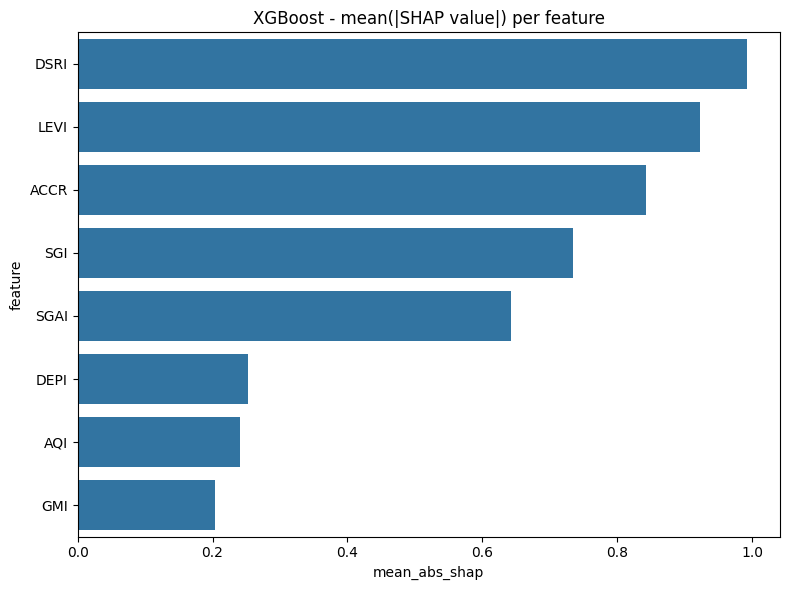

In [ ]:
# -------------------------
# 7. SHAP for XGBoost
# -------------------------
# Compute SHAP values on test set (X_test)
explainer = shap.TreeExplainer(models['XGBoost'])
shap_values = explainer.shap_values(X_test)  # returns array shape (n_samples, n_features)

# Feature importance summary (mean absolute SHAP)
shap_summary = pd.DataFrame({
    'feature': X.columns,
    'mean_abs_shap': np.mean(np.abs(shap_values), axis=0)
}).sort_values(by='mean_abs_shap', ascending=False)
print("\nSHAP feature importance (XGBoost):")
print(shap_summary)

# Save shap summary
shap_summary.to_csv("xgb_shap_feature_importance.csv", index=False)
print("Saved xgb_shap_feature_importance.csv")

# -------------------------
# 8. Plots (matplotlib / plotly) - for notebook or saving as images
# -------------------------
# ROC plot (plotly)
fig = go.Figure()
for model_name, (fpr, tpr) in roc_data.items():
    fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=model_name))
fig.update_layout(title="ROC curves: Beneish vs ML models", xaxis_title="False Positive Rate", yaxis_title="True Positive Rate")
fig.write_html("roc_beneish_vs_ml.html")
print("Saved ROC plot to roc_beneish_vs_ml.html")

# SHAP summary plot (matplotlib)
plt.figure(figsize=(8,6))
sns.barplot(x='mean_abs_shap', y='feature', data=shap_summary, orient='h')
plt.title("XGBoost - mean(|SHAP value|) per feature")
plt.tight_layout()
plt.savefig("xgb_shap_summary.png")
print("Saved SHAP summary image xgb_shap_summary.png")

In [1]:
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
SCORING = "f1_weighted"

In [6]:
def find_optimal_cv(model, X, y, cv_candidates):
    best_cv = None
    best_score = -np.inf

    for cv in cv_candidates:
        scores = cross_val_score(
            model, X, y,
            cv=cv,
            scoring=SCORING
        )
        mean_score = scores.mean()

        if mean_score > best_score:
            best_score = mean_score
            best_cv = cv

    return best_cv, best_score

In [7]:
import pandas as pd

# Load your dataset and calculate Mscore as in cell FPmQYhW3cxDd
df = pd.read_excel("/content/Earnings Manipulator (1).xlsx")
df = df.copy()
df['Mscore'] = (
    -4.84
    + 0.92 * df['DSRI']
    + 0.528 * df['GMI']
    + 0.404 * df['AQI']
    + 0.892 * df['SGI']
    + 0.115 * df['DEPI']
    - 0.172 * df['SGAI']
    + 4.679 * df['ACCR']
    - 0.327 * df['LEVI']
)

df["Beneish_Pred"] = (df["Mscore"] > -2.22).astype(int)

In [9]:
from sklearn.naive_bayes import GaussianNB

# Define X and y from the global df DataFrame
X = df[['DSRI','GMI','AQI','SGI','DEPI','SGAI','ACCR','LEVI']].astype(float)
y = df['Manipulator'].map({'No': 0, 'Yes': 1}).astype(int)

nb = GaussianNB()

cv_nb, score_nb = find_optimal_cv(
    nb, X, y,
    cv_candidates=range(3, 11)
)

nb.fit(X, y)

print("Naive Bayes Optimal CV:", cv_nb)
print("Naive Bayes CV F1:", score_nb)

Naive Bayes Optimal CV: 3
Naive Bayes CV F1: 0.8594334028197667


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipe_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier())
])

cv_knn, _ = find_optimal_cv(
    pipe_knn, X, y,
    cv_candidates=range(3, 11)
)

param_knn = {
    "model__n_neighbors": range(3, 21, 2),
    "model__weights": ["uniform", "distance"]
}

gs_knn = GridSearchCV(
    pipe_knn,
    param_knn,
    cv=cv_knn,
    scoring=SCORING
)

gs_knn.fit(X, y)

print("KNN Optimal CV:", cv_knn)
print("KNN Best Score:", gs_knn.best_score_)
print("KNN Params:", gs_knn.best_params_)

KNN Optimal CV: 7
KNN Best Score: 0.8394750880705192
KNN Params: {'model__n_neighbors': 5, 'model__weights': 'distance'}


In [11]:
from sklearn.svm import SVC

pipe_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("model", SVC(class_weight="balanced"))
])

cv_svm, _ = find_optimal_cv(
    pipe_svm, X, y,
    cv_candidates=range(3, 9)
)

param_svm = {
    "model__C": [0.1, 1, 10],
    "model__kernel": ["linear", "rbf"]
}

gs_svm = GridSearchCV(
    pipe_svm,
    param_svm,
    cv=cv_svm,
    scoring=SCORING
)

gs_svm.fit(X, y)

print("SVM Optimal CV:", cv_svm)
print("SVM Best Score:", gs_svm.best_score_)
print("SVM Params:", gs_svm.best_params_)

SVM Optimal CV: 3
SVM Best Score: 0.884692534791235
SVM Params: {'model__C': 1, 'model__kernel': 'rbf'}


In [12]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42)

cv_ada, _ = find_optimal_cv(
    ada, X, y,
    cv_candidates=range(3, 9)
)

param_ada = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1]
}

gs_ada = GridSearchCV(
    ada,
    param_ada,
    cv=cv_ada,
    scoring=SCORING
)

gs_ada.fit(X, y)

print("AdaBoost Optimal CV:", cv_ada)
print("AdaBoost Best Score:", gs_ada.best_score_)
print("AdaBoost Params:", gs_ada.best_params_)

AdaBoost Optimal CV: 7
AdaBoost Best Score: 0.8909355331796858
AdaBoost Params: {'learning_rate': 1, 'n_estimators': 200}


In [13]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False
)

cv_xgb, _ = find_optimal_cv(
    xgb, X, y,
    cv_candidates=range(3, 7)
)

param_xgb = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5],
    "learning_rate": [0.05, 0.1]
}

gs_xgb = GridSearchCV(
    xgb,
    param_xgb,
    cv=cv_xgb,
    scoring=SCORING
)

gs_xgb.fit(X, y)

print("XGBoost Optimal CV:", cv_xgb)
print("XGBoost Best Score:", gs_xgb.best_score_)
print("XGBoost Params:", gs_xgb.best_params_)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:34:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:34:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:34:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:34:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:34:55] WARNING: /w

XGBoost Optimal CV: 5
XGBoost Best Score: 0.8554572445098761
XGBoost Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:35:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [14]:
models = {
    "Naive Bayes": nb,
    "KNN": gs_knn.best_estimator_,
    "SVM": gs_svm.best_estimator_,
    "AdaBoost": gs_ada.best_estimator_,
    "XGBoost": gs_xgb.best_estimator_
}

In [15]:
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

results = []

for name, model in models.items():
    scores = cross_val_score(
        model,
        X, y,
        cv=5,
        scoring="f1_weighted"
    )
    results.append({
        "Model": name,
        "Mean_F1": scores.mean(),
        "Std_F1": scores.std()
    })

results_df = pd.DataFrame(results).sort_values("Mean_F1", ascending=False)
print(results_df)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:35:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:35:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:35:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:35:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:35:42] WARNING: /w

         Model   Mean_F1    Std_F1
3     AdaBoost  0.898784  0.039763
2          SVM  0.872421  0.060634
4      XGBoost  0.855457  0.028895
0  Naive Bayes  0.852412  0.052702
1          KNN  0.806895  0.027222


In [16]:
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

print("✅ BEST OVERALL MODEL")
print("Model:", best_model_name)

✅ BEST OVERALL MODEL
Model: AdaBoost


In [17]:
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold, cross_validate

In [18]:
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc"
}

In [20]:
results = []

cv = 5  # Define a consistent CV value for comparison

for name, model in models.items():
    cv_results = cross_validate(
        model,
        X, y,
        cv=cv,
        scoring=scoring,
        return_train_score=False
    )

    results.append({
        "Model": name,
        "Accuracy": np.mean(cv_results["test_accuracy"]),
        "Precision": np.mean(cv_results["test_precision"]),
        "Recall": np.mean(cv_results["test_recall"]),
        "F1": np.mean(cv_results["test_f1"]),
        "ROC_AUC": np.mean(cv_results["test_roc_auc"])
    })

cv_results_df = pd.DataFrame(results).sort_values("F1", ascending=False)

print("\n=== Cross-Validated Model Comparison ===\n")
print(cv_results_df)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:36:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:36:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:36:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/p


=== Cross-Validated Model Comparison ===

         Model  Accuracy  Precision    Recall        F1   ROC_AUC
3     AdaBoost  0.909091   0.888095  0.567857  0.678615  0.894351
2          SVM  0.868182   0.622319  0.750000  0.669708  0.897761
0  Naive Bayes  0.859091   0.666667  0.489286  0.560693  0.822486
4      XGBoost  0.872727   0.803333  0.414286  0.528718  0.872968
1          KNN  0.845455   0.603333  0.225000  0.309479  0.759701


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:36:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [21]:
# Select best model name based on highest CV F1
best_model_name = cv_results_df.iloc[0]["Model"]

print("✅ Best Model (by CV F1):", best_model_name)

✅ Best Model (by CV F1): AdaBoost


In [22]:
best_model = models[best_model_name]

In [23]:
best_model.fit(X, y)

AdaBoostClassifier(learning_rate=1, n_estimators=200, random_state=42)

In [24]:
print("\n✅ FINAL SELECTED MODEL")
print("Model Name:", best_model_name)
print(best_model)


✅ FINAL SELECTED MODEL
Model Name: AdaBoost
AdaBoostClassifier(learning_rate=1, n_estimators=200, random_state=42)


In [25]:
import joblib

joblib.dump(best_model, "best_earnings_manipulation_model.pkl")

['best_earnings_manipulation_model.pkl']